In [143]:
"""
Load:
  x_a_init.txt
Save:
  x_b.txt
  x_a.txt
"""
import numpy as np
from scipy.integrate import ode
import lorenz96
import matplotlib.pyplot as plt
from settings import *
import matplotlib.pyplot as plt
nT = 800

#set random seed
np.random.seed(201910)

#load true value
x_t_save = np.genfromtxt('x_t.txt')
#print(x_t_save[0])


# load initial condition
x_a_init = np.genfromtxt('x_a_init.txt')
analysis_error = 25.e-2
#x_a_init = np.genfromtxt('x_t.txt')[800] + analysis_error * np.random.randn(N)  # using nature run value plus a small error (for test purpose)
#print(x_a_init[:])

np.random.seed(20191031)
# create observations

observation_error = 25.e-2
y_o_save = np.zeros([nT+1, N])
y_o_save = x_t_save + observation_error * np.random.randn(nT+1, N)
#print(y_o_save[0])

# initial x_b: no values at the initial time (assign NaN)
x_b_save = np.full((1,N), np.nan, dtype='f8')
##print(x_b_save)
# initial x_a: from x_a_ens_init

x_a_save = np.array([x_a_init])
##print(x_a_save)


tt = 1

B = 0.147 * np.identity(40)#backound error covariance 
#B = 0.25 * np.identity(40)#backound error covariance 

#B = np.genfromtxt('B_1224_raw.txt')

R = 0.25 * np.identity(40) #observation error covariance



for i in range(40):
    for j in range(40):
        i = j
        if j+1 != 40:
            B[i][j+1] = 0.0219
        else:
            B[i][j+1-40] = 0.0219
            
        if j+1 != 40 and j+2 != 40:
            B[i][j+2] = -0.0170
        else:
            B[i][j+2-40] = -0.0170
            
        if j-1 != -1 :
            B[i][j-1] = 0.0219
        else:
            B[i][j-2+40] = 0.0219
            
        if j-2 != -1 and j-1 != -1:
            B[i][j-2] = -0.0170
        else:
            B[i][j-2+40] = -0.0170

while tt <= nT:#nT:
    tts = tt - 1
    Ts = tts * dT  # forecast start time
    Ta = tt  * dT  # forecast end time (DA analysis time)
    print('Cycle =', tt, ', Ts =', round(Ts, 10), ', Ta =', round(Ta, 10))

    #--------------
    # forecast step
    #--------------
    F = 9
    solver = ode(lorenz96.f).set_integrator('dopri5')
    solver.set_initial_value(x_a_save[tts], Ts).set_f_params(F)
    solver.integrate(Ta)
    print("a",x_b_save.shape)
    x_b_save = np.vstack([x_b_save, [solver.y]])
    #--------------
    # analysis step
    #--------------

    # background

    x_b = x_b_save[tt].transpose()

    # observation

    # innovation
    y_o = y_o_save[tt].transpose()
    H = np.identity(40)
    y_b = np.dot(H, x_b)
    d = y_o - y_b

    # analysis scheme 
    K = np.dot(B, np.dot(H, np.linalg.inv(np.dot(H, np.dot(B,H))+R)))

    x_a = x_b + np.dot(K,d)
    #x_a = (x_b + y_o)/2
    
    x_a_save = np.vstack([x_a_save, x_a.transpose()])
    #print(x_a_save)
    tt += 1


# save background and analysis data
#np.savetxt('x_b_OI.txt', x_b_save)
#np.savetxt('x_a_OI.txt', x_a_save)

Cycle = 1 , Ts = 0.0 , Ta = 0.05
a (1, 40)
Cycle = 2 , Ts = 0.05 , Ta = 0.1
a (2, 40)
Cycle = 3 , Ts = 0.1 , Ta = 0.15
a (3, 40)
Cycle = 4 , Ts = 0.15 , Ta = 0.2
a (4, 40)
Cycle = 5 , Ts = 0.2 , Ta = 0.25
a (5, 40)
Cycle = 6 , Ts = 0.25 , Ta = 0.3
a (6, 40)
Cycle = 7 , Ts = 0.3 , Ta = 0.35
a (7, 40)
Cycle = 8 , Ts = 0.35 , Ta = 0.4
a (8, 40)
Cycle = 9 , Ts = 0.4 , Ta = 0.45
a (9, 40)
Cycle = 10 , Ts = 0.45 , Ta = 0.5
a (10, 40)
Cycle = 11 , Ts = 0.5 , Ta = 0.55
a (11, 40)
Cycle = 12 , Ts = 0.55 , Ta = 0.6
a (12, 40)
Cycle = 13 , Ts = 0.6 , Ta = 0.65
a (13, 40)
Cycle = 14 , Ts = 0.65 , Ta = 0.7
a (14, 40)
Cycle = 15 , Ts = 0.7 , Ta = 0.75
a (15, 40)
Cycle = 16 , Ts = 0.75 , Ta = 0.8
a (16, 40)
Cycle = 17 , Ts = 0.8 , Ta = 0.85
a (17, 40)
Cycle = 18 , Ts = 0.85 , Ta = 0.9
a (18, 40)
Cycle = 19 , Ts = 0.9 , Ta = 0.95
a (19, 40)
Cycle = 20 , Ts = 0.95 , Ta = 1.0
a (20, 40)
Cycle = 21 , Ts = 1.0 , Ta = 1.05
a (21, 40)
Cycle = 22 , Ts = 1.05 , Ta = 1.1
a (22, 40)
Cycle = 23 , Ts = 1.1 , Ta =

Cycle = 213 , Ts = 10.6 , Ta = 10.65
a (213, 40)
Cycle = 214 , Ts = 10.65 , Ta = 10.7
a (214, 40)
Cycle = 215 , Ts = 10.7 , Ta = 10.75
a (215, 40)
Cycle = 216 , Ts = 10.75 , Ta = 10.8
a (216, 40)
Cycle = 217 , Ts = 10.8 , Ta = 10.85
a (217, 40)
Cycle = 218 , Ts = 10.85 , Ta = 10.9
a (218, 40)
Cycle = 219 , Ts = 10.9 , Ta = 10.95
a (219, 40)
Cycle = 220 , Ts = 10.95 , Ta = 11.0
a (220, 40)
Cycle = 221 , Ts = 11.0 , Ta = 11.05
a (221, 40)
Cycle = 222 , Ts = 11.05 , Ta = 11.1
a (222, 40)
Cycle = 223 , Ts = 11.1 , Ta = 11.15
a (223, 40)
Cycle = 224 , Ts = 11.15 , Ta = 11.2
a (224, 40)
Cycle = 225 , Ts = 11.2 , Ta = 11.25
a (225, 40)
Cycle = 226 , Ts = 11.25 , Ta = 11.3
a (226, 40)
Cycle = 227 , Ts = 11.3 , Ta = 11.35
a (227, 40)
Cycle = 228 , Ts = 11.35 , Ta = 11.4
a (228, 40)
Cycle = 229 , Ts = 11.4 , Ta = 11.45
a (229, 40)
Cycle = 230 , Ts = 11.45 , Ta = 11.5
a (230, 40)
Cycle = 231 , Ts = 11.5 , Ta = 11.55
a (231, 40)
Cycle = 232 , Ts = 11.55 , Ta = 11.6
a (232, 40)
Cycle = 233 , Ts = 1

Cycle = 428 , Ts = 21.35 , Ta = 21.4
a (428, 40)
Cycle = 429 , Ts = 21.4 , Ta = 21.45
a (429, 40)
Cycle = 430 , Ts = 21.45 , Ta = 21.5
a (430, 40)
Cycle = 431 , Ts = 21.5 , Ta = 21.55
a (431, 40)
Cycle = 432 , Ts = 21.55 , Ta = 21.6
a (432, 40)
Cycle = 433 , Ts = 21.6 , Ta = 21.65
a (433, 40)
Cycle = 434 , Ts = 21.65 , Ta = 21.7
a (434, 40)
Cycle = 435 , Ts = 21.7 , Ta = 21.75
a (435, 40)
Cycle = 436 , Ts = 21.75 , Ta = 21.8
a (436, 40)
Cycle = 437 , Ts = 21.8 , Ta = 21.85
a (437, 40)
Cycle = 438 , Ts = 21.85 , Ta = 21.9
a (438, 40)
Cycle = 439 , Ts = 21.9 , Ta = 21.95
a (439, 40)
Cycle = 440 , Ts = 21.95 , Ta = 22.0
a (440, 40)
Cycle = 441 , Ts = 22.0 , Ta = 22.05
a (441, 40)
Cycle = 442 , Ts = 22.05 , Ta = 22.1
a (442, 40)
Cycle = 443 , Ts = 22.1 , Ta = 22.15
a (443, 40)
Cycle = 444 , Ts = 22.15 , Ta = 22.2
a (444, 40)
Cycle = 445 , Ts = 22.2 , Ta = 22.25
a (445, 40)
Cycle = 446 , Ts = 22.25 , Ta = 22.3
a (446, 40)
Cycle = 447 , Ts = 22.3 , Ta = 22.35
a (447, 40)
Cycle = 448 , Ts = 2

Cycle = 643 , Ts = 32.1 , Ta = 32.15
a (643, 40)
Cycle = 644 , Ts = 32.15 , Ta = 32.2
a (644, 40)
Cycle = 645 , Ts = 32.2 , Ta = 32.25
a (645, 40)
Cycle = 646 , Ts = 32.25 , Ta = 32.3
a (646, 40)
Cycle = 647 , Ts = 32.3 , Ta = 32.35
a (647, 40)
Cycle = 648 , Ts = 32.35 , Ta = 32.4
a (648, 40)
Cycle = 649 , Ts = 32.4 , Ta = 32.45
a (649, 40)
Cycle = 650 , Ts = 32.45 , Ta = 32.5
a (650, 40)
Cycle = 651 , Ts = 32.5 , Ta = 32.55
a (651, 40)
Cycle = 652 , Ts = 32.55 , Ta = 32.6
a (652, 40)
Cycle = 653 , Ts = 32.6 , Ta = 32.65
a (653, 40)
Cycle = 654 , Ts = 32.65 , Ta = 32.7
a (654, 40)
Cycle = 655 , Ts = 32.7 , Ta = 32.75
a (655, 40)
Cycle = 656 , Ts = 32.75 , Ta = 32.8
a (656, 40)
Cycle = 657 , Ts = 32.8 , Ta = 32.85
a (657, 40)
Cycle = 658 , Ts = 32.85 , Ta = 32.9
a (658, 40)
Cycle = 659 , Ts = 32.9 , Ta = 32.95
a (659, 40)
Cycle = 660 , Ts = 32.95 , Ta = 33.0
a (660, 40)
Cycle = 661 , Ts = 33.0 , Ta = 33.05
a (661, 40)
Cycle = 662 , Ts = 33.05 , Ta = 33.1
a (662, 40)
Cycle = 663 , Ts = 3

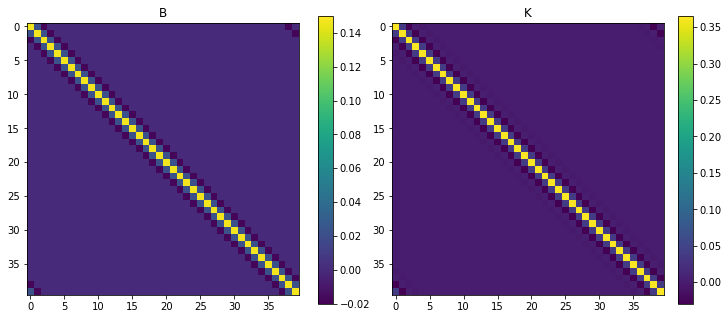

In [144]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)
ax.set_title('B')
plt.imshow(B,vmin=-0.02,vmax=0.15)
ax.set_aspect('equal')
cax = fig.add_axes([0.26, 0.1, 0.26, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

ax2 = fig.add_subplot(122)
ax2.set_title('K')
plt.imshow(K)
ax2.set_aspect('equal')

cax = fig.add_axes([0.26, 0.1, 0.75, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()

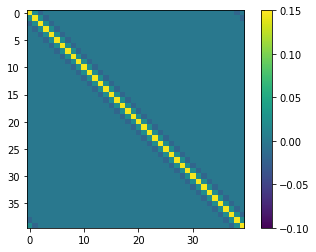

In [152]:
plt.imshow(B, vmin =-0.10, vmax =0.15)
plt.colorbar()
plt.show()

In [146]:
#np.savetxt('B.txt', B)

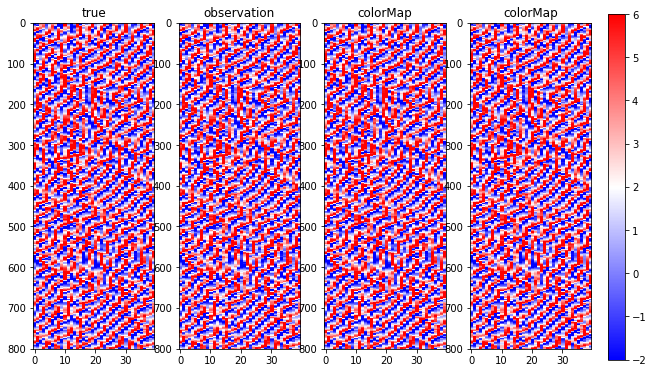

In [147]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(141)
ax.set_title('true')
plt.imshow(x_t_save, cmap = "bwr", vmin=-2, vmax=6)
ax.set_aspect('auto')

ax2 = fig.add_subplot(142)
ax2.set_title('observation')
plt.imshow(y_o_save, cmap = "bwr", vmin=-2, vmax=6)
ax2.set_aspect('auto')


ax3 = fig.add_subplot(143)
ax3.set_title('colorMap')
plt.imshow(x_a_save, cmap = "bwr", vmin=-2, vmax=6)
ax3.set_aspect('auto')


ax4 = fig.add_subplot(144)
ax4.set_title('colorMap')
plt.imshow(x_b_save, cmap = "bwr", vmin=-2, vmax=6)
ax4.set_aspect('auto')


cax = fig.add_axes([0.26, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()

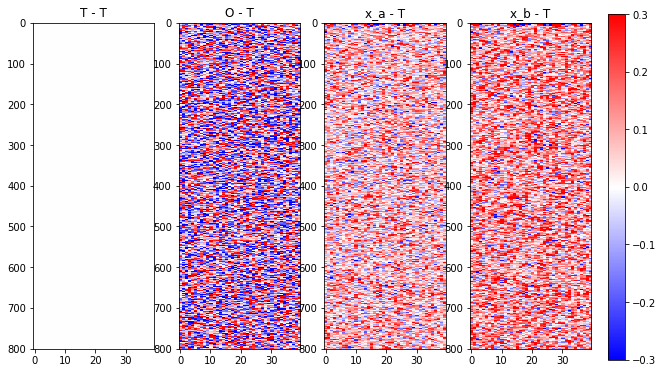

In [148]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(141)
ax.set_title('T - T')
plt.imshow(x_t_save-x_t_save, cmap = "bwr", vmin=-0.3, vmax=0.3)
ax.set_aspect('auto')

ax2 = fig.add_subplot(142)
ax2.set_title('O - T')
plt.imshow(y_o_save-x_t_save, cmap = "bwr", vmin=-0.3, vmax=0.3)
ax2.set_aspect('auto')


ax3 = fig.add_subplot(143)
ax3.set_title('x_a - T')
plt.imshow(x_a_save-x_t_save, cmap = "bwr", vmin=-0.3, vmax=0.3)
ax3.set_aspect('auto')


ax4 = fig.add_subplot(144)
ax4.set_title('x_b - T')
plt.imshow(x_b_save[0:801][:]-x_t_save, cmap = "bwr", vmin=-0.3, vmax=0.3)
ax4.set_aspect('auto')


cax = fig.add_axes([0.26, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()

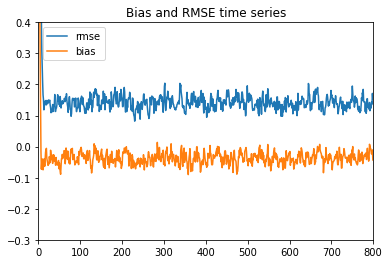

rmse= 0.14088749339625598
bias= -0.03710083861071937


In [149]:
analysis_error = x_b_save-x_t_save -0.14
bias_t = []
rmse_t = []
for i in range(nT):
    
    bias_i = analysis_error[i][:].mean()
    rmse_i = np.std(analysis_error[i][:])
    bias_t = np.append(bias_t, bias_i)
    rmse_t = np.append(rmse_t, rmse_i)


plt.plot(rmse_t, label ="rmse" )
plt.plot(bias_t, label ="bias")
plt.ylim(-0.3,0.4)
plt.xlim(0,800)
plt.legend(loc="upper left")
plt.title("Bias and RMSE time series")
plt.show()
rmse = rmse_t[30:800].mean()
bias = bias_t[30:800].mean()
print("rmse=",rmse)
print("bias=",bias)
#np.savetxt('OI_bias.txt',bias_t)
#np.savetxt('OI_rmse.txt',rmse_t)

In [ ]:
Or 0.181
M 0.5 
M 0.4 0.168
M 0.35 0.163
M 0.30 0.157
M 0.25 0.151
0.20 0.146
0.15 0.144
0.14 0.145
0.13 0.146
0.12 0.149
0.10 0.162